/var/folders/0k/yqmtjnxs38zb0038yrwm03br0000gn/T/ipykernel_13038/670549665.py:21: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Start Time'] = pd.to_datetime(df['Start Time'])


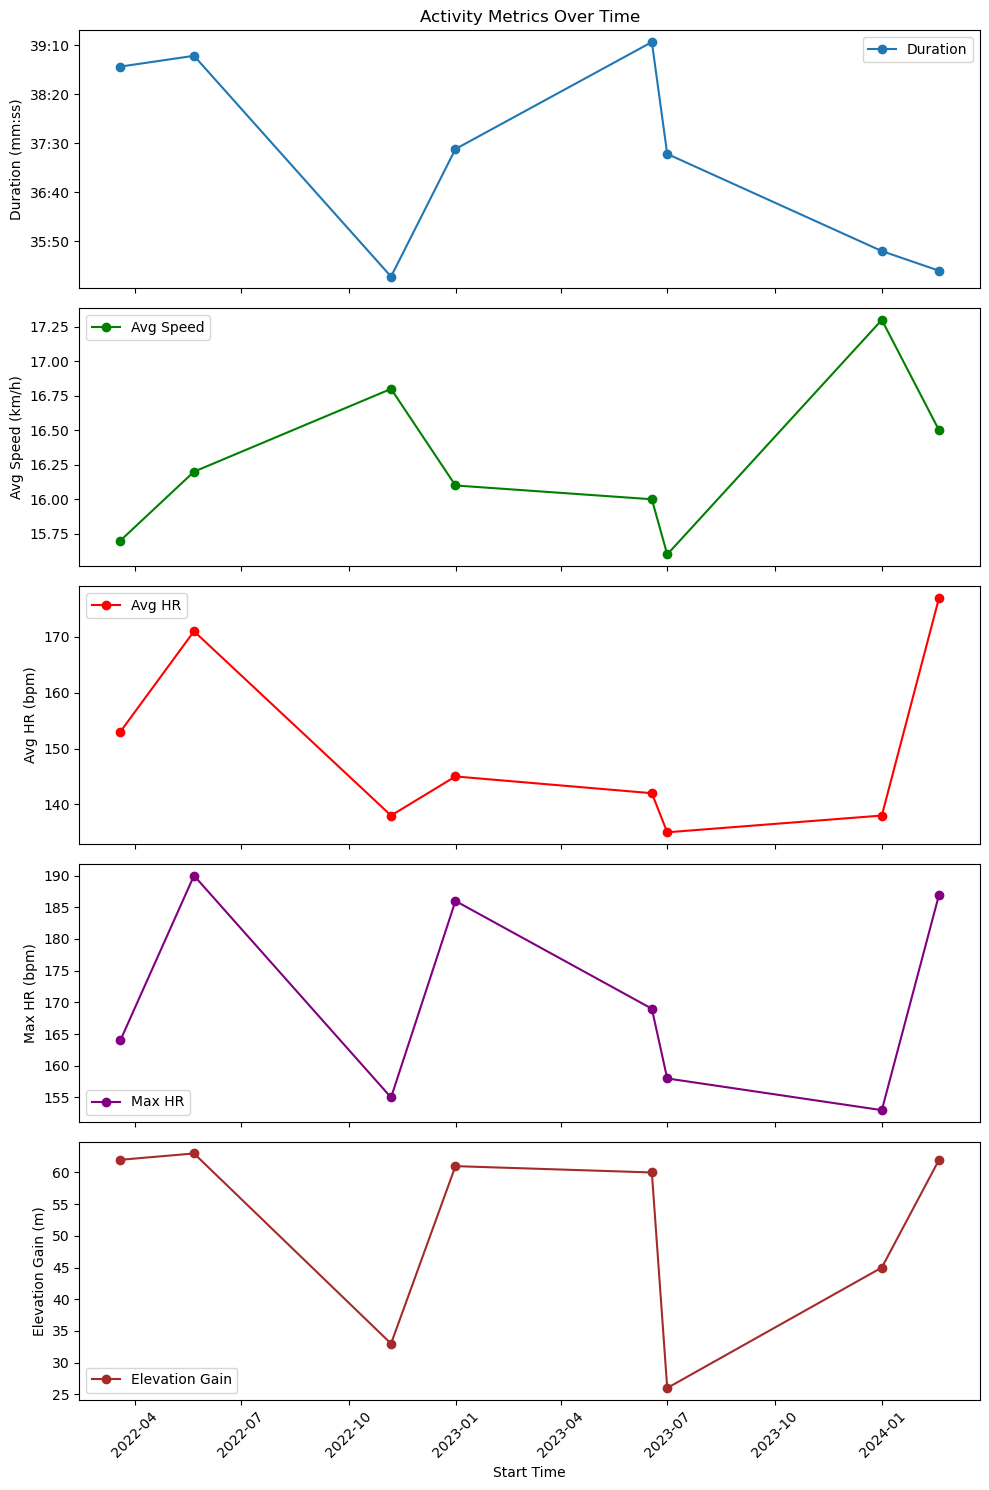

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Simulate the data (replace with your actual data)
data = """ID,Start Time,End Time,Duration (h:m:s),Activity Type,Event Type,Average Speed (km/h),Average Heart Rate (bpm),Max Heart Rate (bpm),Elevation Gain (m)
311,2024-02-18T15:00:06+01:00,2024-02-18T15:48:12+01:00,00:35:20,Running,Race,16.5,177,187,62
353,2023-12-31T14:50:03+01:00,2023-12-31T15:25:43+01:00,00:35:40,Running,Race,17.3,138,153,45
519,2023-06-30T22:00:34+02:00,2023-06-30T22:37:53+02:00,00:37:19,Running,Race,15.6,135,158,26
539,2023-06-17T18:07:45+02:00,2023-06-17T18:46:58+02:00,00:39:13,Running,Race,16.0,142,169,60
730,2022-12-31T13:15:00+01:00,2022-12-31T13:52:24+01:00,00:37:24,Running,Race,16.1,145,186,61
776,2022-11-06T10:08:15+01:00,2022-11-06T10:43:29+01:00,00:35:14,Running,Race,16.8,138,155,33
907,2022-05-21T18:00:33+02:00,2022-05-21T18:39:32+02:00,00:38:59,Running,Race,16.2,171,190,63
957,2022-03-19T15:08:22+01:00,2022-03-19T15:47:10+01:00,00:38:48,Running,Race,15.7,153,164,62"""

# Create DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Convert 'Start Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Convert 'Duration (h:m:s)' to timedelta
df['Duration'] = pd.to_timedelta(df['Duration (h:m:s)'])

# Plotting
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

# Duration Plot
axes[0].plot(df['Start Time'], df['Duration'].dt.total_seconds(), marker='o', label='Duration')
axes[0].set_ylabel('Duration (mm:ss)')
axes[0].set_title('Activity Metrics Over Time')

def format_mm_ss(x, _):
    total_seconds = int(x)
    minutes = total_seconds // 60
    seconds = total_seconds % 60
    return f"{minutes:02d}:{seconds:02d}"

axes[0].yaxis.set_major_formatter(FuncFormatter(format_mm_ss))
axes[0].legend()

# Average Speed Plot
axes[1].plot(df['Start Time'], df['Average Speed (km/h)'], marker='o', label='Avg Speed', color='g')
axes[1].set_ylabel('Avg Speed (km/h)')
axes[1].legend()

# Average Heart Rate Plot
axes[2].plot(df['Start Time'], df['Average Heart Rate (bpm)'], marker='o', label='Avg HR', color='r')
axes[2].set_ylabel('Avg HR (bpm)')
axes[2].legend()

# Max Heart Rate Plot
axes[3].plot(df['Start Time'], df['Max Heart Rate (bpm)'], marker='o', label='Max HR', color='purple')
axes[3].set_ylabel('Max HR (bpm)')
axes[3].legend()

# Elevation Gain Plot
axes[4].plot(df['Start Time'], df['Elevation Gain (m)'], marker='o', label='Elevation Gain', color='brown')
axes[4].set_ylabel('Elevation Gain (m)')
axes[4].legend()

# Formatting x-axis
axes[4].set_xlabel('Start Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()